<a href="https://colab.research.google.com/github/katarianavneet7/Machine-learning-project-Linear-regression/blob/main/PorjectCogni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/assingment/train.csv')

In [ ]:
len(dataset)

1460

In [ ]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dataset.shape

(1460, 81)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
corr=dataset.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [ ]:
corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [ ]:
print(dataset.corr().abs().nlargest(6, 'SalePrice').index)
print(dataset.corr().abs().nlargest(6, 'SalePrice').values[:,37])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')
[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055]


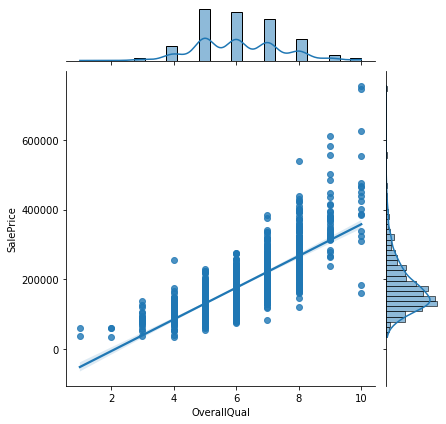

In [ ]:
sns.jointplot(x = "OverallQual", y = "SalePrice", data = dataset, kind = "reg");

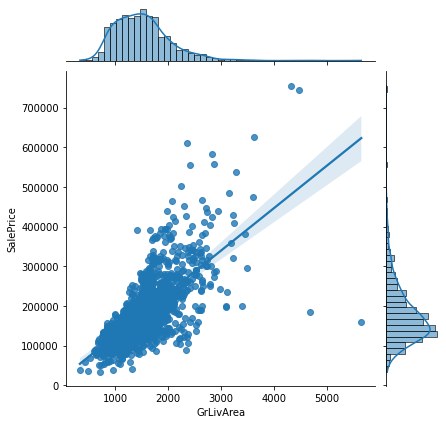

In [ ]:
sns.jointplot(x = "GrLivArea", y = "SalePrice", data = dataset, kind = "reg");

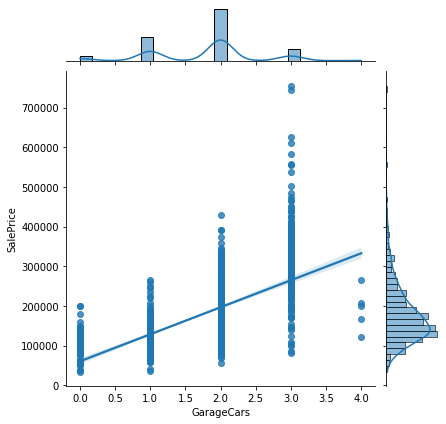

In [ ]:
sns.jointplot(x = "GarageCars", y = "SalePrice", data = dataset, kind = "reg");

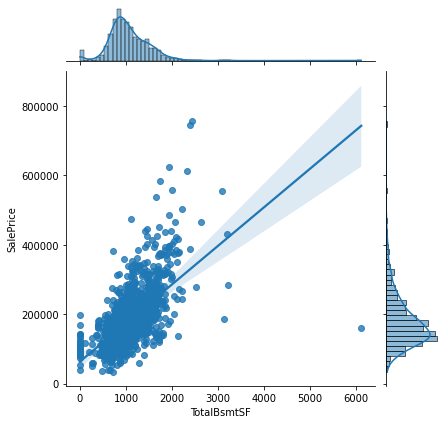

In [ ]:
sns.jointplot(x = "TotalBsmtSF", y = "SalePrice", data = dataset, kind = "reg");

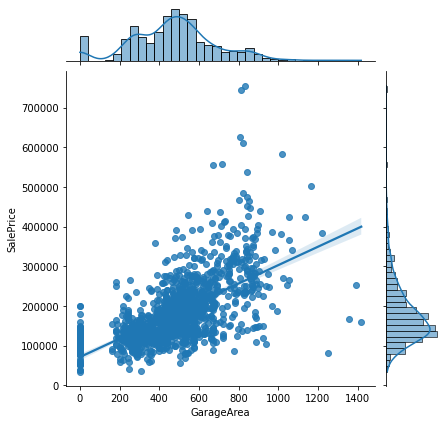

In [ ]:
sns.jointplot(x = "GarageArea", y = "SalePrice", data = dataset, kind = "reg");

In [ ]:
lm  = LinearRegression()

In [ ]:
X = pd.DataFrame(np.c_[dataset['GrLivArea'], dataset['OverallQual']], columns = ['GrLivArea','OverallQual'])
y = dataset[["SalePrice"]]

In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3,
random_state=5)

In [ ]:
model = lm.fit(x_train, Y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(Y_test, model.predict(x_test))

In [ ]:
y_pred[0:5]

array([[261207.32474752],
       [183122.79075913],
       [213751.23975283],
       [ 97800.71231675],
       [175360.7865621 ]])

In [ ]:
# The mean absolute error
print("MAE = %5.3f" % mean_absolute_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(Y_test, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(Y_test, y_pred))
# Root-Mean-Squared-Error (RMSE)
# print("RMSE = %5.3f" % rmse (Y_test, y_pred))

MAE = 28168.246
R^2 = 0.70939
MSE = 1649153161.228


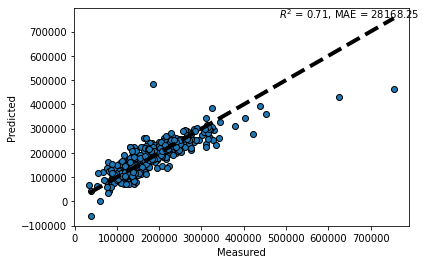

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0, 0, 0))
ax.text(y_pred.max()-4.5, Y_test.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

In [ ]:
y.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.0,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [ ]:
df=dataset.loc[:,['GrLivArea','OverallQual',"GarageArea","TotalBsmtSF","GarageCars"]]
y = dataset[["SalePrice"]]
df

,GrLivArea,OverallQual,GarageArea,TotalBsmtSF,GarageCars
0,1710,7,548,856,2
1,1262,6,460,1262,2
2,1786,7,608,920,2
3,1717,7,642,756,3
4,2198,8,836,1145,3
...,...,...,...,...,...
1455,1647,6,460,953,2
1456,2073,6,500,1542,2
1457,2340,7,252,1152,1
1458,1078,5,240,1078,1


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(df, y, test_size = 0.3,
random_state=5)

In [ ]:
model = lm.fit(x_train, Y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(Y_test, model.predict(x_test))

In [ ]:
print("MAE = %5.3f" % mean_absolute_error(Y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print("R^2 = %0.5f" % r2_score(Y_test, y_pred))
# The mean squared error
print("MSE = %5.3f" % mean_squared_error(Y_test, y_pred))
# Root-Mean-Squared-Error (RMSE)
# print("RMSE = %5.3f" % rmse(Y_test, y_pred))

MAE = 24498.665
R^2 = 0.75478
MSE = 1391598026.533


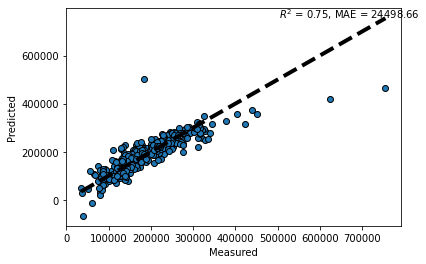

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Y_test, y_pred, edgecolors = (0, 0, 0))
ax.text(y_pred.max()-4.5, Y_test.max()-0.1, r"$R^2$ = %.2f, MAE = %.2f" % (
r2_score(Y_test, y_pred), mean_absolute_error(Y_test, y_pred)))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "k--",
lw = 4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()


In [ ]:
final=dataset.loc[:,['GrLivArea','OverallQual',"GarageArea","TotalBsmtSF","GarageCars"]]
y_pred_test= model.predict(final)
submission  = pd.DataFrame()
submission['Id']=dataset['Id']
submission["SalePrice"]=y_pred_test
submission.info()
submission.to_csv('submission.csv', index=False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1460 non-null   int64  
 1   SalePrice  1460 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [ ]:
submission.head()

,Id,SalePrice
0,1,210862.754907
1,2,177938.236579
2,3,216689.849045
3,4,226414.485992
4,5,286180.071042
